# Part 1. EDA & Visualization
## Load Data

In [15]:
import pandas as pd
import os

processed_dir = 'processed'

video = 'chega-be'
pklfiles = [f for f in os.listdir('processed') if os.path.isfile(os.path.join('processed', f)) and f.endswith('.pkl')]
print(pklfiles)

# Initialize data structures for summary information
object_counts = []
emotion_counts = []

['ad-be.pkl', 'ad-cdu.pkl', 'ad-chega.pkl', 'ad-il.pkl', 'ad-livre.pkl', 'ad-pan.pkl', 'ad-ps.pkl', 'be-ps.pkl', 'cdu-be.pkl', 'cdu-ps.pkl', 'chega-be.pkl', 'chega-cdu.pkl', 'chega-il.pkl', 'chega-ps.pkl', 'il-be.pkl', 'il-cdu.pkl', 'il-ps.pkl', 'livre-be.pkl', 'livre-cdu.pkl', 'livre-chega.pkl', 'livre-il.pkl', 'livre-ps.pkl', 'pan-be.pkl', 'pan-cdu.pkl', 'pan-chega.pkl', 'pan-il.pkl', 'pan-livre.pkl', 'pan-ps.pkl']


## Explore Extracted Data

### Detection of emotions and confidence level

### Build Histograms

####  All Objects - Absolute Numbers

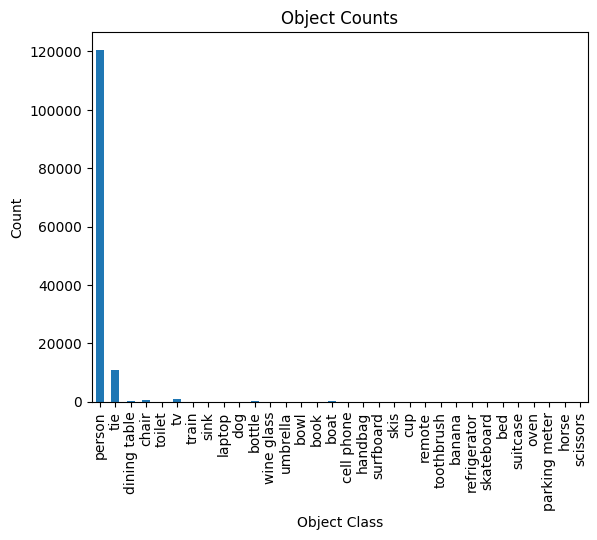

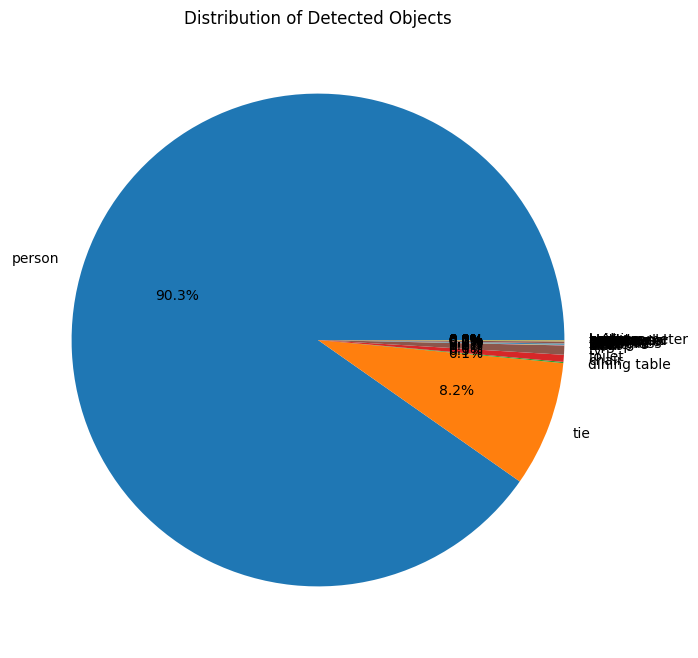

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

all_objects = {}
confidence_per_object = {}

for file in pklfiles:
    data_path = os.path.join(processed_dir, file)
    data = pd.read_pickle(data_path)
    for frame_num in range(len(data)):
        for obj in data.iloc[frame_num]['detections']:
            obj_name = obj[4]
            confidence = obj[5]
            
            if obj_name not in all_objects:
                all_objects[obj_name] = 1
                confidence_per_object[obj_name] = [confidence]
            else:
                all_objects[obj_name] += 1
                confidence_per_object[obj_name].append(confidence)

# Plot object counts
object_counts = pd.Series(all_objects)

# Plot object counts as a bar chart
object_counts.plot(kind='bar')
plt.title('Object Counts')
plt.xlabel('Object Class')
plt.ylabel('Count')
plt.show()

# Pie chart of object counts
object_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Detected Objects')
plt.ylabel('')
plt.show()


#### All Objects - Percentage

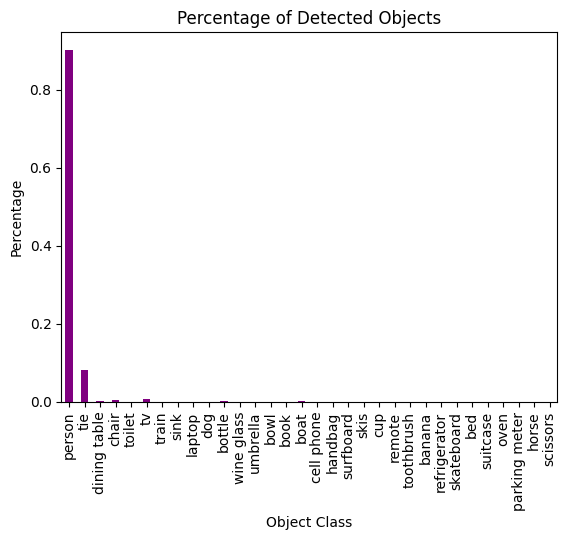

In [17]:
# Percentage for each object in a histogram
total_objects = sum(all_objects.values())
object_percentages = {obj: count/total_objects for obj, count in all_objects.items()}
pd.Series(object_percentages).plot(kind='bar', color='purple')
plt.title('Percentage of Detected Objects')
plt.xlabel('Object Class')
plt.ylabel('Percentage')
plt.show()

#### Filtering - Exclude objects that appear less than 0.1%

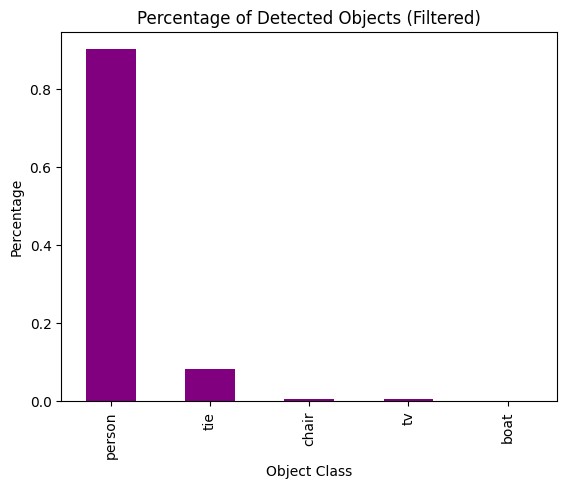

In [18]:
filter_threshold = 0.001
object_percentages_filtered = {obj: count for obj, count in object_percentages.items() if count > filter_threshold}
pd.Series(object_percentages_filtered).plot(kind='bar', color='purple')
plt.title('Percentage of Detected Objects (Filtered)')
plt.xlabel('Object Class')
plt.ylabel('Percentage')
plt.show()

#### Confidence Level

In [21]:
import numpy as np
avg_confidence_per_object = {}
# Calculate average confidence per object
for obj in confidence_per_object:
    avg_confidence_per_object[obj]  = np.mean(confidence_per_object[obj])

# Print the average confidences
print("Object Confidence:", confidence_per_object)



# Calculate the average confidence of all objects
print(f"Average confidence of all objects: {avg_confidence_per_object}")# Compute summary statistics

df_confidence_per_object = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in confidence_per_object.items()]))

summary_statistics = df_confidence_per_object.describe()

print("Summary statistics of the confidence of each object:")
print(summary_statistics)

Object Confidence: {'person': [0.83203125, 0.94140625, 0.92578125, 0.9375, 0.85546875, 0.69921875, 0.65625, 0.61328125, 0.87890625, 0.89453125, 0.9375, 0.91796875, 0.75390625, 0.84375, 0.85546875, 0.93359375, 0.91015625, 0.93359375, 0.93359375, 0.9375, 0.92578125, 0.9375, 0.73828125, 0.5234375, 0.9375, 0.93359375, 0.93359375, 0.92578125, 0.83203125, 0.63671875, 0.59375, 0.94140625, 0.94140625, 0.88671875, 0.92578125, 0.91796875, 0.94140625, 0.9375, 0.94140625, 0.93359375, 0.9375, 0.91796875, 0.8671875, 0.90234375, 0.9375, 0.92578125, 0.91796875, 0.88671875, 0.94140625, 0.93359375, 0.84375, 0.94140625, 0.93359375, 0.94140625, 0.93359375, 0.90234375, 0.80078125, 0.69921875, 0.61328125, 0.96875, 0.91796875, 0.91796875, 0.92578125, 0.89453125, 0.90234375, 0.93359375, 0.90234375, 0.73828125, 0.63671875, 0.5, 0.92578125, 0.96484375, 0.95703125, 0.953125, 0.88671875, 0.9609375, 0.87890625, 0.87890625, 0.94140625, 0.92578125, 0.81640625, 0.81640625, 0.95703125, 0.953125, 0.83203125, 0.94921875

##### Plot - Histogram

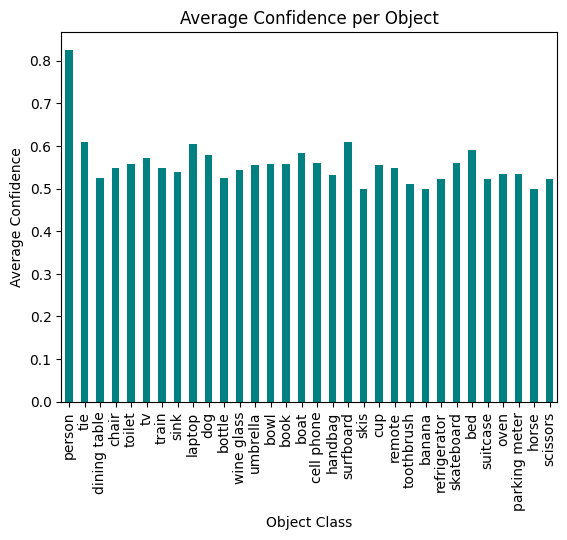

In [ ]:
# Plot the average confidence for each object
pd.Series(confidence_per_object).plot(kind='bar', color='teal')
plt.title('Average Confidence per Object')
plt.xlabel('Object Class')
plt.ylabel('Average Confidence')
plt.show()

##### Box Plot

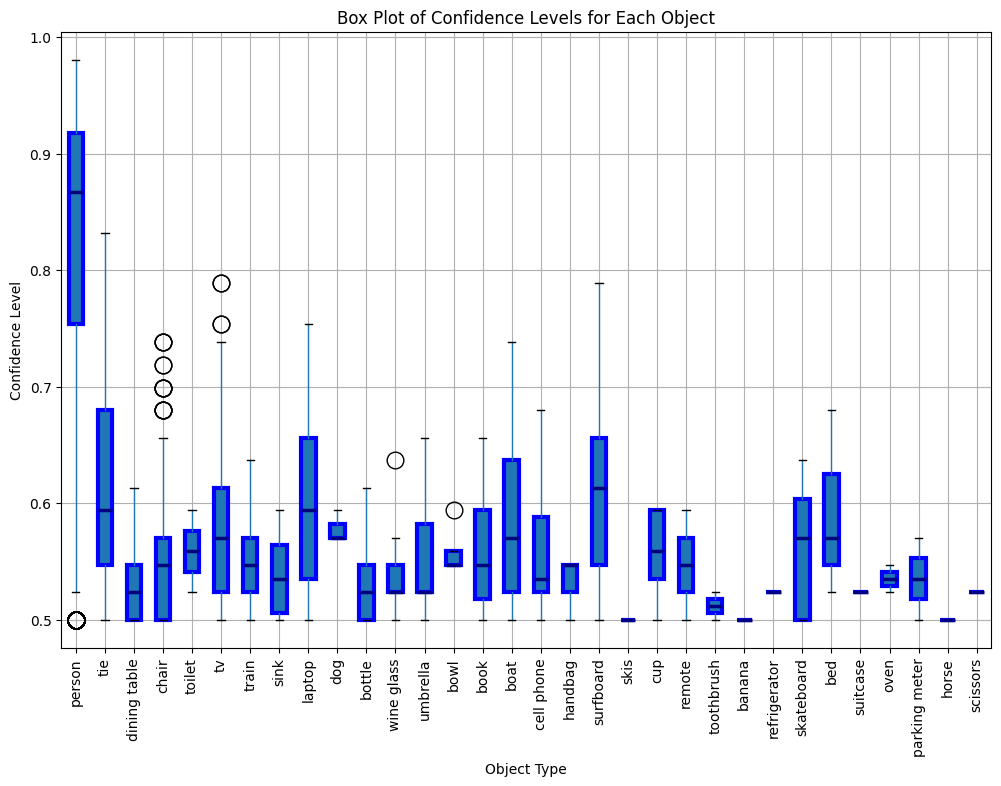

In [23]:
plt.figure(figsize=(12, 8))
boxprops = dict(linestyle='-', linewidth=3, color='blue')
flierprops = dict(marker='o', markersize=12, linestyle='none')
medianprops = dict(linestyle='-', linewidth=2.5, color='navy')
meanprops = dict(marker='^', markeredgecolor='black', markerfacecolor='skyblue')

df_confidence_per_object.boxplot(boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, meanprops=meanprops, patch_artist=True)

plt.title('Box Plot of Confidence Levels for Each Object')
plt.ylabel('Confidence Level')
plt.xlabel('Object Type')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Turning the histogram into a percentage:

<Axes: >

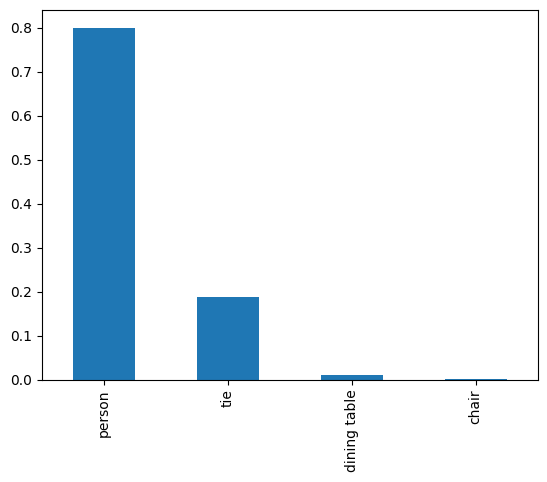

In [ ]:
objects = []
n_objects = 0
for frame_number in range(len(data)):
    for object in data.iloc[frame_number]['detections']:
        objects.append(object[4])

objects = pd.Series(objects)
objects.value_counts(normalize=True).plot(kind='bar')


#### Emotions - for all the parties

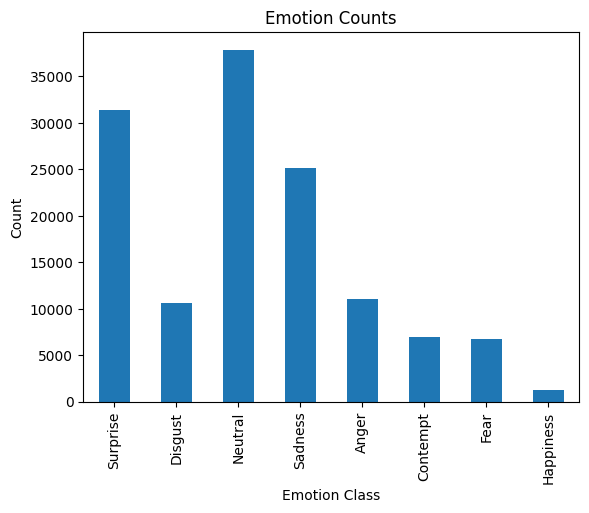

In [ ]:
#Emotion histogram
emotions_total = {}
for file in pklfiles:
    data_path = os.path.join(processed_dir, file)
    data = pd.read_pickle(data_path)
    for frame_num in range(len(data)):
        for face in data.iloc[frame_num]['fer']:
            emotion_name = face['emotion']
            if emotion_name not in emotions_total:
                emotions_total[emotion_name] = 1
            else:
                emotions_total[emotion_name] += 1

emotion_counts = pd.Series(emotions_total)
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts')
plt.xlabel('Emotion Class')
plt.ylabel('Count')
plt.show()


Make it a percentage and pie diagram

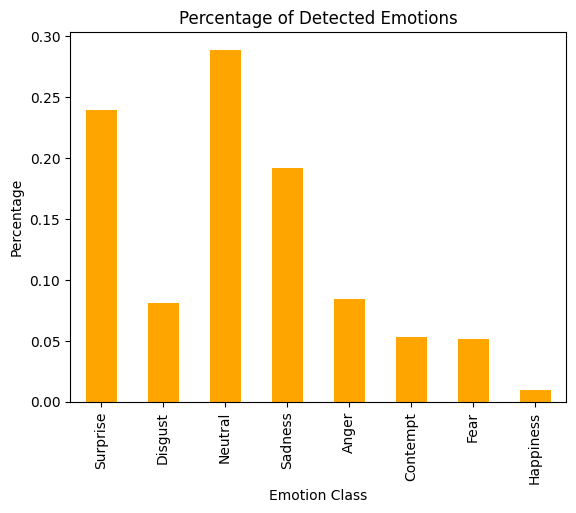

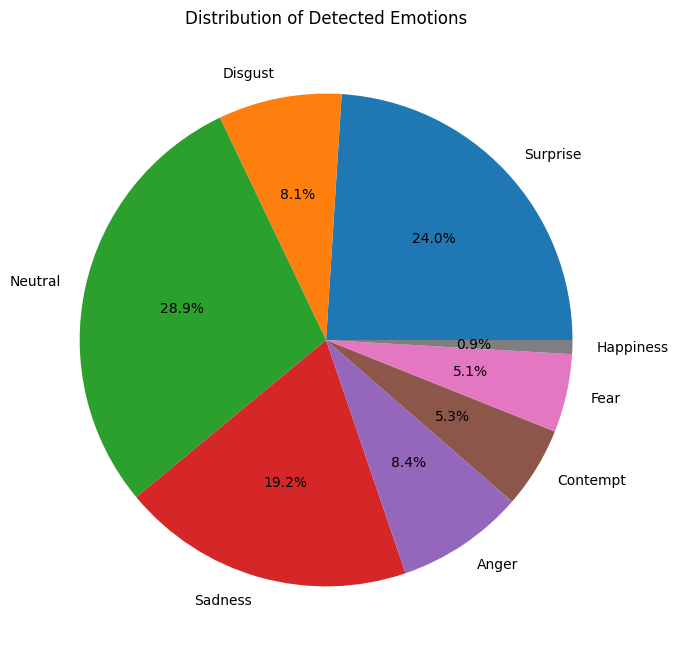

In [ ]:
# Make the emotion counts a percentage for a histogram
emotion_percentages = {emotion: count/sum(emotions_total.values()) for emotion, count in emotions_total.items()}
pd.Series(emotion_percentages).plot(kind='bar', color='orange')
plt.title('Percentage of Detected Emotions')
plt.xlabel('Emotion Class')
plt.ylabel('Percentage')
plt.show()

# Pie chart of emotion counts
emotion_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Detected Emotions')
plt.ylabel('')
plt.show()